In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load cleaned data
clean_mdf=pd.read_csv('/Users/robertpatton/Desktop/D208_clean.csv', index_col=0)

In [3]:
#Examine cleaned data
clean_mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Lat                                  10000 non-null  float64
 2   Lng                                  10000 non-null  float64
 3   Children                             10000 non-null  int64  
 4   Age                                  10000 non-null  int64  
 5   VitD_levels                          10000 non-null  float64
 6   Doc_visits                           10000 non-null  int64  
 7   vitD_supp                            10000 non-null  int64  
 8   HighBlood                            10000 non-null  int64  
 9   Stroke                               10000 non-null  int64  
 10  Overweight                           10000 non-null  int64  
 11  Arthritis                    

In [4]:
#Define dependent and predictor variables and create initial regression model
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'vitD_supp',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',      
       'HighBlood', 
       'Stroke', 
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain', 
       'Anxiety', 
       'Allergic_rhinitis', 
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.327
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.144
Time:                        08:11:15   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9978   BIC:                         2.337e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

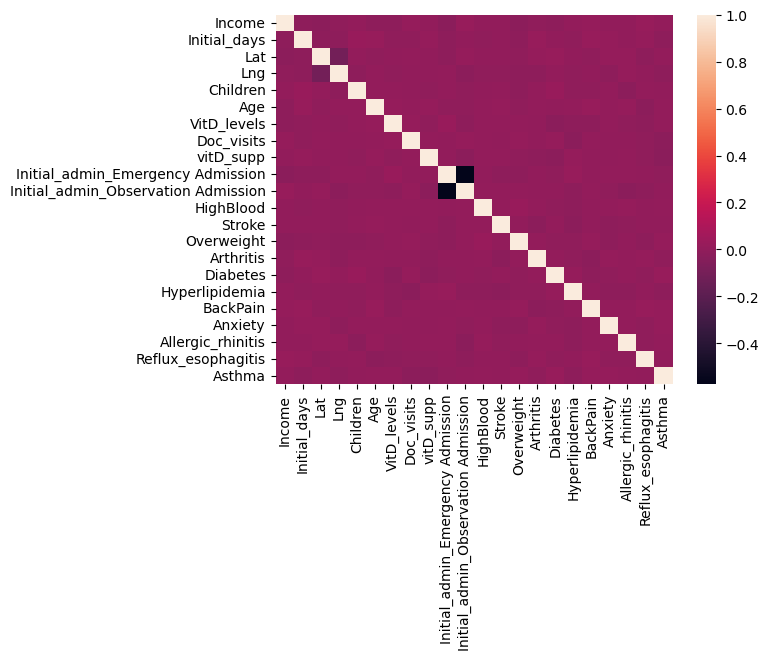

In [5]:
#Create correlation matrix and initial model heatmap
clean_mdf_initial_heatmap=clean_mdf[['Income', 
                 'Initial_days',
                 'Lat',
                 'Lng',
                 'Children',
                 'Age',
                 'VitD_levels', 
                 'Doc_visits',
                 'vitD_supp',
                 'Initial_admin_Emergency Admission',
                 'Initial_admin_Observation Admission',
                 'HighBlood', 
                 'Stroke', 
                 'Overweight', 
                 'Arthritis', 
                 'Diabetes', 
                 'Hyperlipidemia', 
                 'BackPain', 
                 'Anxiety', 
                 'Allergic_rhinitis', 
                 'Reflux_esophagitis', 
                 'Asthma',]]

sns.heatmap(clean_mdf_initial_heatmap.corr(), annot=False)
plt.show()

In [6]:
#Remove values with high p-values and create initial regression model
#Starting with Anxiety
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'vitD_supp',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',      
       'HighBlood', 
       'Stroke', 
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',  
       'Allergic_rhinitis', 
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.394
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.113
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9979   BIC:                         2.337e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [7]:
#Removing Allergic_rhinitis
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'vitD_supp',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',      
       'HighBlood', 
       'Stroke', 
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain', 
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.467
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0861
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9980   BIC:                         2.337e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [8]:
#Removing HighBlood
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'vitD_supp',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Stroke', 
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.548
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0644
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9981   BIC:                         2.337e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [9]:
#Removing vitD_supp
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Stroke', 
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.638
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0470
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9982   BIC:                         2.337e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [10]:
#Removing Stroke
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight', 
       'Arthritis', 
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.738
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0335
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9983   BIC:                         2.337e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [11]:
#Removing Arthritis
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Asthma','Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.837
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0247
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9984   BIC:                         2.337e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [12]:
#Removing Asthma
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Children',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.938
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0186
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9985   BIC:                         2.337e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [13]:
#Removing Children
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes', 
       'Hyperlipidemia', 
       'BackPain',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.038
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0146
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9986   BIC:                         2.336e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [14]:
#Removing Hyperlipidemia
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Lng',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes',  
       'BackPain',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.137
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0121
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9987   BIC:                         2.336e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [15]:
#Removing Lng
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes',  
       'BackPain',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.259
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00965
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9988   BIC:                         2.336e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [16]:
#Removing BackPain
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',
       'Diabetes',     
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.389
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00794
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9989   BIC:                         2.336e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [17]:
#Removing Diabetes
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Age',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',    
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.535
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00667
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9990   BIC:                         2.336e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [18]:
#Removing Age
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'VitD_levels', 
       'Doc_visits',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission',
       'Overweight',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.674
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00621
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9991   BIC:                         2.336e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [19]:
#Removing Initial_admin_Emergency Admission
y=clean_mdf['Income']
X=clean_mdf[['Lat',
             'VitD_levels',
             'Doc_visits',   
             'Initial_admin_Observation Admission',    
             'Overweight',   
             'Reflux_esophagitis',
             'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.872
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00539
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9992   BIC:                         2.336e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [20]:
#Removing VitD_levels
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Doc_visits',
       'Initial_admin_Observation Admission',
       'Overweight',   
       'Reflux_esophagitis', 
       'Initial_days']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.087
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00507
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9993   BIC:                         2.336e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [21]:
#Removing Initial_days
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Doc_visits',
       'Initial_admin_Observation Admission',
       'Overweight',   
       'Reflux_esophagitis']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.365
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00487
Time:                        08:11:16   Log-Likelihood:            -1.1676e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9994   BIC:                         2.336e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [22]:
#Removing Doc_visits
y=clean_mdf['Income']
X=clean_mdf[['Lat',
       'Initial_admin_Observation Admission',
       'Overweight',   
       'Reflux_esophagitis']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.744
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00478
Time:                        08:11:16   Log-Likelihood:            -1.1677e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9995   BIC:                         2.336e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [23]:
#Removing Reflux_esophagitis
y=clean_mdf['Income']
X=clean_mdf[['Lat',
             'Initial_admin_Observation Admission',
             'Overweight']].assign(const=1)

clean_mdf_model=sm.OLS(y, X)
clean_mdf_results= clean_mdf_model.fit()
print(clean_mdf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.107
Date:                Sun, 24 Dec 2023   Prob (F-statistic):            0.00638
Time:                        08:11:16   Log-Likelihood:            -1.1677e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9996   BIC:                         2.336e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

In [24]:
#Removing Overweight and generate final reduced regression model
y=clean_mdf['Income']
X=clean_mdf[['Lat',
             'Initial_admin_Observation Admission']].assign(const=1)

reduced_model=sm.OLS(y, X)
reduced_results= reduced_model.fit()
print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.343
Date:                Sun, 24 Dec 2023   Prob (F-statistic):             0.0130
Time:                        08:11:16   Log-Likelihood:            -1.1677e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9997   BIC:                         2.336e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
La

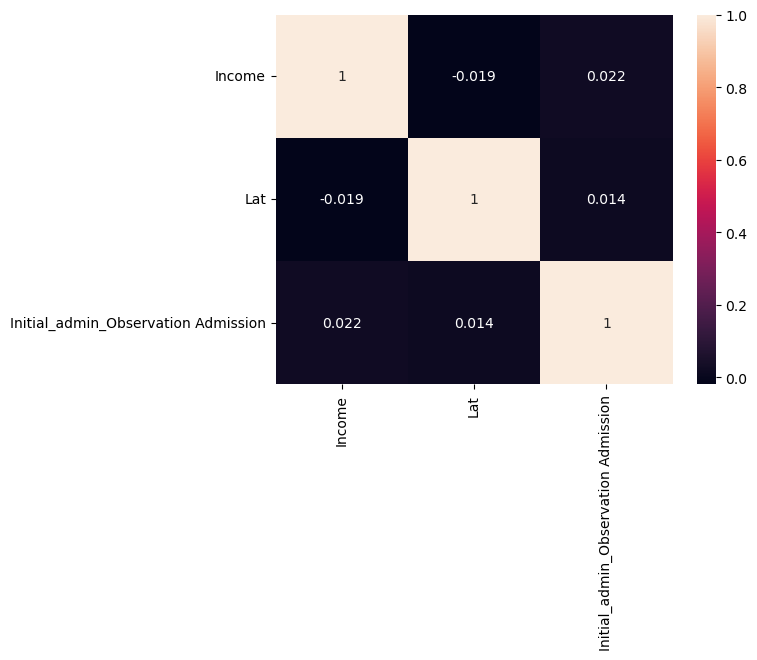

In [25]:
#Create a reduced heatmap model
clean_mdf_reduced_heatmap=clean_mdf[['Income', 'Lat', 'Initial_admin_Observation Admission']]
sns.heatmap(clean_mdf_reduced_heatmap.corr(), annot=True)
plt.show()

In [26]:
#Create dataframe of predicted values and residuels

clean_mdf["Predicted_income"] = reduced_results.predict(X)
clean_mdf["Residuals"] = reduced_results.resid
clean_mdf.head()

,Income,Lat,Lng,Children,Age,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,...,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Predicted_income,Residuals
0,86575.93,34.34960,-86.72508,1,53,19.141466,6,0,1,0,...,1,1,1,0,1,10.585770,1,0,40588.421955,45987.508045
1,46805.99,30.84513,-85.22907,3,51,18.940352,4,1,1,0,...,0,0,0,1,0,15.129562,1,0,40952.504478,5853.485522
2,14370.14,43.54321,-96.63772,3,53,18.057507,4,0,1,0,...,0,0,0,0,0,4.772177,0,0,39633.289589,-25263.149589
3,39741.49,43.89744,-93.51479,0,78,16.576858,4,0,0,1,...,0,0,0,1,1,1.714879,0,0,39596.488317,145.001683
4,1209.56,37.59894,-76.88958,1,22,17.439069,5,2,0,0,...,0,0,1,0,0,1.254807,0,0,40250.845116,-39041.285116


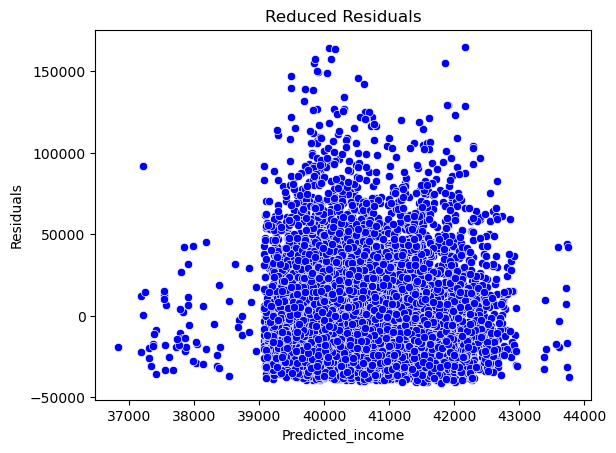

In [27]:
#Create scatterplot of residuals
clean_mdf['Intercept']=1
sns.scatterplot(x='Predicted_income', y='Residuals', data=clean_mdf, color='blue')
plt.title('Reduced Residuals')
plt.show()

In [28]:
#Residual stand
model = sm.OLS(y, X).fit()
model.resid.std(ddof=X.shape[1])

28511.623588158807